In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
NBC_df = pd.read_excel(r'C:\Users\bhavrang\Desktop\bhavya\Analytics\NBC_data_jan_aug.xlsx')

In [3]:
CURRENCY_DM_MAP_DF=pd.read_excel(r'C:\Users\bhavrang\Desktop\bhavya\Analytics\DM_ID_MAPPING.xlsx',sheet_name='currency_mapping')
DEVICE_DM_MAP_DF=pd.read_excel(r'C:\Users\bhavrang\Desktop\bhavya\Analytics\DM_ID_MAPPING.xlsx',sheet_name='device_mapping')

In [4]:
#DEVICE_DM_MAP_DF.dtypes
DEVICE_DM_MAP_DF['DEVICE_DM_ID']=DEVICE_DM_MAP_DF['DEVICE_DM_ID'].astype(str)

In [5]:
#CURRENCY_DM_MAP_DF.dtypes
CURRENCY_DM_MAP_DF['CURRENCY_DM_ID']=CURRENCY_DM_MAP_DF['CURRENCY_DM_ID'].astype(str)

In [6]:
df=NBC_df
# to drop all 'DT_DM_ID' columns
li=[]
for i in df:
    if ('DT_DM_ID' in i):
        li.append(i)
df.drop(df[li],axis =1,inplace=True)

In [7]:
#to split summary description column to 2 new fields as subscription start date and end date. 
#two more fields are added to dataframe.
summary=df['SUMMARY_DESC'].str.split('for',expand=True)
timedf=summary[1].str.split('-',expand=True)
df['SUB_ST_DT']=timedf[0]
df['SUB_END_DT']=timedf[1]
df['NEW_SUMMARY_DESC']=summary[0]

In [8]:
#to convert invalid promocode values to 'INVALID'
df['PROMO_CODE']=df['PROMO_CODE'].apply(lambda x: 'INVALID' if (type(x)!=str) else x)

In [9]:
list_str_op=['AUTO_RENEW_STATUS','DATA_SOURCE_STATUS','DEL_IND','PAYMENT_SOURCE_TYPE','CREATED_BY','RENEW_IND','SUSCRIPTION_STATUS','TAX_COUNTRY','WINBACK_IND','TAX_STATE','PROMO_CODE','EXPERIENCE_ID','LAST_UPD_BY','SPORT_SEASON_DM_ID','CAMPAIGN_DM_ID','BILL_ZIP_CD','DEVICE_DM_ID']
list_cnv_op=['BATCH_ID','CURRENCY_DM_ID','GOLD_SUBSCRIPTION_ID','SPORT_DM_ID','USER_DM_ID','DEVICE_DM_ID']
list_re_zero=['TAX_AMT','TAX_RATE','TAX_REF_AMT','TOTAL_TP_FEES_AMT']


In [10]:
# function to apply string operations
def str_op(list):
    for i in list:
        df[i]=df[i].apply(lambda x: str(x).strip().upper())
        

In [11]:
#function to apply conversion operations
def cnv_op(list):
    for i in list:
        df[i]=df[i].astype(str)

In [12]:
df.shape

(367844, 48)

In [13]:
# function to replace "?" with 0
def rep_zero(list):
    for i in list:
        df[i].replace(to_replace='^ ?',value=0,regex=True,inplace=True) 

In [14]:
str_op(list_str_op)

In [15]:
cnv_op(list_cnv_op)

In [16]:
rep_zero(list_re_zero)

In [17]:
#to map device_dm_id with respective values and replace others as invalid.New column DEVICE_NM is added to df
df=pd.merge(df,DEVICE_DM_MAP_DF,how='left',on='DEVICE_DM_ID')
df['DEVICE_NM'].fillna('INVALID',inplace=True)
df['DEVICE_NM']=df['DEVICE_NM'].apply(lambda x: str(x).strip().upper())

In [18]:
#to map currency_dm_id with respective values and replace others as invalid.new column Currency_NM is added to df
df=pd.merge(df,CURRENCY_DM_MAP_DF[['CURRENCY_DM_ID','CURRENCY_NM']],how='left',on='CURRENCY_DM_ID')
df['CURRENCY_NM'].fillna('INVALID',inplace=True)
df['CURRENCY_NM']=df['CURRENCY_NM'].apply(lambda x: str(x).strip().upper())

In [19]:
df['CAMPAIGN_DM_ID'].replace(to_replace='?',value='NULL',inplace=True) 
df['CAMPAIGN_DM_ID'].replace(to_replace='-1',value='UNMAPPED',inplace=True) 

In [20]:
df['PROMO_CODE'].replace(to_replace='?',value='NOT APPLICABLE',inplace=True) 

In [21]:
df['PAYMENT_SOURCE_TYPE'].replace(to_replace='?',value='NOT KNOWN',inplace=True) 

In [22]:
df['TAX_COUNTRY'].replace(to_replace='?',value='NOT KNOWN',inplace=True) 

In [23]:
df['TAX_STATE'].replace(to_replace='?',value='NOT KNOWN',inplace=True) 

In [24]:
df['WINBACK_IND'].replace(to_replace='?',value='NEW USER',inplace=True) 

In [25]:
df['BILL_ZIP_CD'].replace(to_replace='?',value='NOT KNOWN',inplace=True) 

In [26]:
del_li=['DEL_IND','EXPERIENCE_ID','LAST_UPD_BY','LAST_UPD_DT_TIME','SUMMARY_DESC']
df.drop(df[del_li],axis =1,inplace=True)

In [27]:
len(df.SUBSCRIPTION_ID.unique())

355266

In [27]:
df.to_excel(excel_writer=r'C:\Users\bhavrang\Desktop\bhavya\Analytics\NBCdata1.xlsx')

In [28]:
#newdf['DEVICE_NM']=newdf['DEVICE_NM'].astype('category')

In [28]:
#to get the no.of active days that a customer have
df['active'] = np.where(df['DATA_SOURCE_STATUS']=='ACTIVE',df['USER_ACCESS_EXP_DT']-df['SUBSCRIPTION_START_DT'] , df['CANCELLATION_DT']-df['SUBSCRIPTION_START_DT'])
df['check']=df['USER_ACCESS_EXP_DT']>'2018-12-31'
df['dummy']=np.where(df['check']==True,df['USER_ACCESS_EXP_DT']-np.datetime64('2018-12-31'),0)
df['active_days']=df['active']-df['dummy']
df['ACTIVE_DAYS']=df['active_days'] / np.timedelta64(1, 'D')
df.drop(['active','check','dummy','active_days'],axis =1,inplace=True)


In [29]:
df.columns

Index(['GOLD_SUBSCRIPTION_ID', 'SUBSCRIPTION_ID', 'USER_DM_ID', 'SPORT_DM_ID',
       'Sport name', 'SPORT_TERM_DM_ID', 'SUBSCRIPTION_START_DT',
       'DATA_SOURCE_STATUS', 'SUSCRIPTION_STATUS', 'CURRENCY_DM_ID',
       'SUBCRIPTION_PRICE', 'TOTAL_CHARGED_AMT', 'TOTAL_TP_FEES_AMT',
       'CHARGE_COUNT', 'TOTAL_REFUNDED_AMT', 'TOTAL_TP_FEES_REFUNDED_AMT',
       'LAST_BILLING_DT', 'NEXT_BILLING_DT', 'CANCELLATION_DT',
       'USER_ACCESS_EXP_DT', 'SUBSCRIPTION_TRIAL_END_DT',
       'SUBSCRIPTION_GRCPD_START_DT', 'RENEW_IND', 'AUTO_RENEW_STATUS',
       'CAMPAIGN_DM_ID', 'DEVICE_DM_ID', 'PROMO_CODE', 'TAX_AMT', 'TAX_RATE',
       'TAX_COUNTRY', 'TAX_STATE', 'CREATED_BY', 'CREATE_DT_TIME', 'BATCH_ID',
       'BILL_ZIP_CD', 'TERM_CONV_DT', 'SPORT_SEASON_DM_ID', 'TAX_REF_AMT',
       'WINBACK_IND', 'PAYMENT_SOURCE_TYPE', 'SUB_ST_DT', 'SUB_END_DT',
       'NEW_SUMMARY_DESC', 'DEVICE_NM', 'CURRENCY_NM', 'ACTIVE_DAYS'],
      dtype='object')

In [30]:
#deleting the records of payment failure and currency name other than 'USD'
new_df=df[(df['DATA_SOURCE_STATUS']!='PAYMENT FAILURE')&(df['CURRENCY_NM']=='USD')][['USER_DM_ID','Sport name','DEVICE_NM','WINBACK_IND','AUTO_RENEW_STATUS','RENEW_IND','PAYMENT_SOURCE_TYPE']].copy()
new_df=pd.get_dummies(new_df, columns=['Sport name','DEVICE_NM','WINBACK_IND','AUTO_RENEW_STATUS','RENEW_IND','PAYMENT_SOURCE_TYPE'])

In [31]:
#to sum up all the records per user
new_df=new_df.groupby('USER_DM_ID').sum()
#new_df['USER_DM_ID']=new_df.index

In [32]:
#to get the count of the unique subscriptions for a user 
#do it after filtering unique userids else we will get the value repeated
res=df.groupby('USER_DM_ID')['SUBSCRIPTION_ID'].nunique().reset_index(name='UNIQUE_SUB_COUNT')
#after taking subscription count only we need to join the dfs for user_dm_id
new_df=pd.merge(new_df,res,how='left',on='USER_DM_ID')

In [33]:
#to count the total amount charged per user 
chargedf=df[['USER_DM_ID','CHARGE_COUNT','SUBCRIPTION_PRICE','TOTAL_CHARGED_AMT','TOTAL_REFUNDED_AMT','ACTIVE_DAYS']].copy()
chargedf=chargedf.groupby('USER_DM_ID').sum()
new_df=pd.merge(new_df,chargedf,how='left',on='USER_DM_ID')

In [34]:
#to get the status of a user by verifiying his all subscriptions
#deleting payment failure records from the data.
df1=df[['USER_DM_ID','DATA_SOURCE_STATUS']]
df1.drop(df1[df1['DATA_SOURCE_STATUS']=='PAYMENT FAILURE'].index,inplace=True)
DSS=df1.groupby(['USER_DM_ID','DATA_SOURCE_STATUS'])['DATA_SOURCE_STATUS'].count().reset_index(name='COUNT')

C:\Users\bhavrang\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
DSS['USER_STATUS'] = np.where(DSS['DATA_SOURCE_STATUS']=='ACTIVE', 0, 1)
res1=DSS.groupby('USER_DM_ID').sum()

In [36]:
new_df=pd.merge(new_df,res1,how='left',on='USER_DM_ID')
new_df.drop(['COUNT'],axis=1,inplace=True)
new_df['USER_STATUS'].replace(to_replace=0,value='ACTIVE',inplace=True)
new_df['USER_STATUS'].replace(to_replace=1,value='CANCELLED',inplace=True)

In [37]:
new_df['USER_STATUS'].replace(to_replace='ACTIVE',value=1,inplace=True)
new_df['USER_STATUS'].replace(to_replace='CANCELLED',value=0,inplace=True)

In [57]:
df.shape

(367844, 46)

In [39]:
new_df.head()

,USER_DM_ID,Sport name_Sport1,Sport name_Sport12,Sport name_Sport15,Sport name_Sport16,Sport name_Sport17,Sport name_Sport18,Sport name_Sport19,Sport name_Sport2,Sport name_Sport21,...,PAYMENT_SOURCE_TYPE_NOT KNOWN,PAYMENT_SOURCE_TYPE_PAYPAL,PAYMENT_SOURCE_TYPE_VISA CARD,UNIQUE_SUB_COUNT,CHARGE_COUNT,SUBCRIPTION_PRICE,TOTAL_CHARGED_AMT,TOTAL_REFUNDED_AMT,ACTIVE_DAYS,USER_STATUS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,2,49.99,49.99,0.0,151.0,1
1,100,0,0,0,0,0,0,0,0,0,...,0,1,0,1,2,54.99,54.99,0.0,232.0,1
2,10000,0,0,0,0,0,0,0,0,0,...,0,0,1,1,2,54.99,54.99,0.0,227.0,1
3,100001,0,0,0,0,0,0,0,0,0,...,0,1,0,1,2,49.99,49.99,0.0,151.0,1
4,100002,1,0,0,0,0,0,0,0,0,...,0,0,0,1,2,49.99,49.99,0.0,189.0,1


In [131]:
new_df.to_excel(excel_writer=r'C:\Users\bhavrang\Desktop\bhavya\Analytics\NBCdata_userlevel.xlsx')

In [66]:
new_df.drop(['DEVICE_NM_INVALID'],axis=1,inplace=True)

In [67]:
d1=new_df[new_df['USER_STATUS']==0]
d2=new_df[new_df['USER_STATUS']==1].sample(n=6933)
new_df1=pd.concat([d1,d2])

In [80]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [65]:
import pandas_profiling as pf
profile = pf.ProfileReport(df)
profile.to_file(outputfile="newreport.html")

In [ ]:
new_df.shape

In [72]:
#partitioning data into x and y variables
X=new_df.iloc[:,:-1]
y=new_df.iloc[:,49]


In [73]:
#splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=50)

In [74]:
#fitting logistic regression to the given data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100,random_state=100)
result=lr.fit(X_train,y_train)

C:\Users\bhavrang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
#predicting y value
y_pred=lr.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[ 1080   217]
 [   25 62220]]


In [75]:
lr.score(X,y)

0.99582319558587

In [469]:
#to get the churn probabilites of each user.
res=lr.predict_proba(X)
res=pd.DataFrame(res,columns=['CANCELLED_PROBABILITY','ACTIVE_PROBABILITY'])
prob1=X.join(res)


In [471]:
#to export the probability data
prob1[['USER_DM_ID','CANCELLED_PROBABILITY','ACTIVE_PROBABILITY']].to_excel(excel_writer=r'C:\Users\bhavrang\Desktop\bhavya\Analytics\user_probability_v2.xlsx')

In [470]:
prob1[['USER_DM_ID','CANCELLED_PROBABILITY','ACTIVE_PROBABILITY']]

,USER_DM_ID,CANCELLED_PROBABILITY,ACTIVE_PROBABILITY
0,1,0.087310,0.912690
1,100,0.015954,0.984046
2,10000,0.014243,0.985757
3,100001,0.009179,0.990821
4,100002,0.003797,0.996203
5,100003,0.003973,0.996027
6,100005,0.015986,0.984014
7,100007,0.009168,0.990832
8,100009,0.003978,0.996022
9,10001,0.031251,0.968749


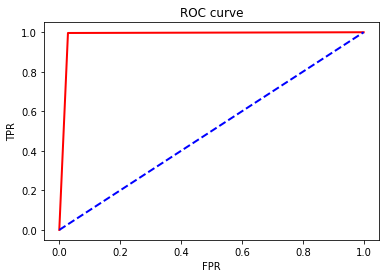

In [455]:
#import matplotlib.pyplot as plt
#import sklearn.metrics as sm
##Computing false and true positive rates
fpr, tpr,_=sm.roc_curve(lr.predict(X),y,drop_intermediate=False)

%matplotlib inline
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [451]:
coef_values=lr.coef_[0]
type(coef_values)
coef_values=pd.DataFrame({'COEF':coef_values})
lr.coef_[0]
col=X.columns

In [452]:
col=pd.DataFrame({'COLUMN':col})
col['COEF']=coef_values['COEF']

In [474]:
col.sort_values(by=['COEF'])

,COLUMN,COEF
47,TOTAL_REFUNDED_AMT,-2.298668e-01
45,SUBCRIPTION_PRICE,-1.039498e-01
40,PAYMENT_SOURCE_TYPE_NOT KNOWN,-1.495039e-02
3,Sport name_Sport15,-1.042756e-02
30,WINBACK_IND_NEW USER,-8.256126e-03
28,DEVICE_NM_UNMAPPED,-7.647204e-03
44,CHARGE_COUNT,-7.299921e-03
32,AUTO_RENEW_STATUS_FALSE,-4.035064e-03
34,RENEW_IND_N,-3.164643e-03
35,RENEW_IND_Y,-2.137289e-03


In [475]:
new_df.shape

(317707, 50)

In [45]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 1000,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [496]:
lr.predict_log_proba(X)

array([[-1.01756055e+01, -3.80889470e-05],
       [-1.22552011e+01, -4.76030545e-06],
       [-1.21055367e+01, -5.52883229e-06],
       ...,
       [-1.06965587e+01, -2.26229122e-05],
       [-5.53901369e-12, -2.59192047e+01],
       [-9.98328212e+00, -4.61663660e-05]])

In [608]:
lr.decision_function(X)

array([ 2.14287703,  2.38573681,  2.57263654, ...,  4.06924479,
       -9.55797504,  4.04340846])

In [472]:
lr.score(X,y)

0.99582319558587

In [641]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 1000,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [276]:
lr.intercept_

array([0.02345789])

In [299]:
import seaborn as sns

In [305]:
%matplotlib inline

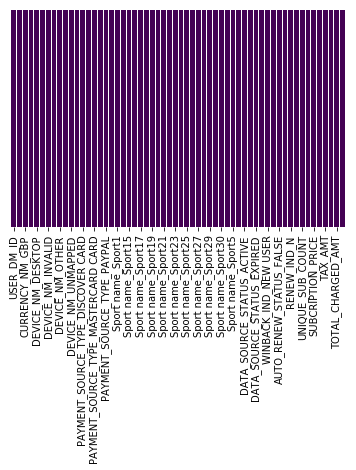

In [306]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [307]:
sns.set_style('whitegrid')

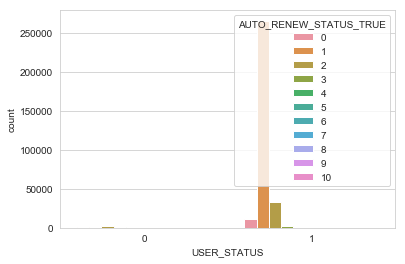

In [314]:
sns.countplot(x='USER_STATUS',hue='AUTO_RENEW_STATUS_TRUE',data=new_df)

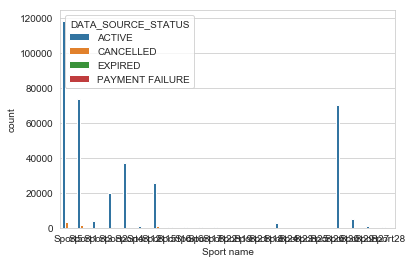

In [329]:
sns.countplot(x='Sport name',hue='DATA_SOURCE_STATUS',data=df)

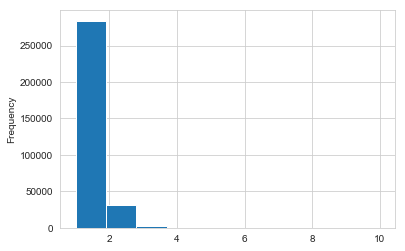

In [326]:
new_df['UNIQUE_SUB_COUNT'].plot.hist()

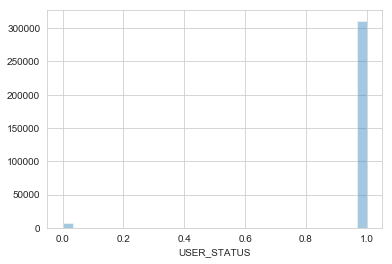

In [320]:
sns.distplot(new_df['USER_STATUS'],kde=False,bins=30)

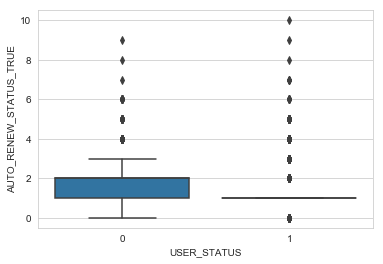

In [333]:
sns.boxplot(x='USER_STATUS',y='AUTO_RENEW_STATUS_TRUE',data=new_df)

In [90]:
varlist=['Sport name','RENEW_IND','AUTO_RENEW_STATUS','CAMPAIGN_DM_ID','PROMO_CODE','TAX_COUNTRY','BATCH_ID','WINBACK_IND','PAYMENT_SOURCE_TYPE','DEVICE_NM','CURRENCY_NM']
target='DATA_SOURCE_STATUS'
dum=['RENEW_IND','AUTO_RENEW_STATUS']

In [129]:
pd.crosstab(df['DATA_SOURCE_STATUS'],[df['AUTO_RENEW_STATUS'],df['DEVICE_NM']])

AUTO_RENEW_STATUS    FALSE                                                    \
DEVICE_NM          DESKTOP GAME_CONSOLE INVALID MOBILE OTHER TABLET UNMAPPED   
DATA_SOURCE_STATUS                                                             
ACTIVE                6807            4    5107   1879     1    892      530   
CANCELLED             1308            1     552    539     1    204      242   
EXPIRED                 16            0       0     21     0      4        1   
PAYMENT FAILURE          0            0       0      0     0      0        0   

AUTO_RENEW_STATUS     TRUE                                                    
DEVICE_NM          DESKTOP GAME_CONSOLE INVALID MOBILE OTHER TABLET UNMAPPED  
DATA_SOURCE_STATUS                                                            
ACTIVE               96268           67   84565  53076     2  19025    92517  
CANCELLED             1300            0     660    711     0    242     1187  
EXPIRED                  0            0       0      0     0      0        0  
PAYMENT FAILURE          7            0       0      6     0      1      101

In [93]:
def cross_tab_fun(li,target):
    for i in li:
        res=pd.crosstab(df[target],df[i])
        print(res)

In [94]:
cross_tab_fun(dum,target)

RENEW_IND                N       Y
DATA_SOURCE_STATUS                
ACTIVE              234342  126398
CANCELLED             2457    4490
EXPIRED                 34       8
PAYMENT FAILURE        111       4
AUTO_RENEW_STATUS   FALSE    TRUE
DATA_SOURCE_STATUS               
ACTIVE              15220  345520
CANCELLED            2847    4100
EXPIRED                42       0
PAYMENT FAILURE         0     115


In [99]:
res= pd.crosstab(df.AUTO_RENEW_STATUS,[df.DATA_SOURCE_STATUS])

In [104]:
res


DATA_SOURCE_STATUS,ACTIVE,CANCELLED,EXPIRED,PAYMENT FAILURE
AUTO_RENEW_STATUS,,,,
FALSE,15220,2847,42,0
TRUE,345520,4100,0,115
